Recently, I’ve become quite interested in fandoms. In particular, I’m curious about the process through which characters become the collective property of amateur writers.

With multiple authors involved, do these “shared characters” maintain a consistent storyline or mythos? What topics return again and again, and what new elements are introduced? In short, is an e pluribus unum for characters written by multiple people even possible?

My hypothesis is that such a thing is possible, due to recurring topics that hold together the core of a character even as its edges expand, sometimes in radical ways.

## Source texts

All characters are, in some regard, the product of multiple authors. (Just as we’re rewriting the same seven plots over and over again, arguably we’re recycling the same characters, just in slightly different garb. Merlin, Gandalf, and Dumbledore come immediately to mind. ) But there are particular places, especially with the advent of online writing communities, where the collaborative process of writing characters is on full display.

One of these places is [creepypasta](http://www.creepypasta.com/), where amateur writers submit and comment on “pastas” or small, easily sharable stories. On creepypasta, these pastas are based in the horror genre, and often involve figures familiar to the genre—devils and ghosts and haunted houses. Among their ranks is a character by the name of Slender Man, who, while not as recognizable, perhaps, as Satan, nevertheless carries his own bit of infamy. 

Slender Man is an internet creation (he was born on an internet forum in 2009). He also, tragically, managed to cross into the real world when, in 2014, two young girls from Wisconsin stabbed a classmate 19 times in order to impress him.

I wanted to learn more about a character whose unrealness is so profound, whose seams show so intensely for anyone with the slightest bit of skill with a web browser, but who still manages to occupy a solid enough role in the cultural imagination that people continue to write him. And write him they do. He has his own tag on creepypasta, as well as one of the most viewed pastas—the pasta entitled simply ‘Slenderman’ has been viewed over 1.2 million times.

To get these stories, I scraped the [six pages of entries for the tag ‘slenderman’](http://www.creepypasta.com/tag/slenderman/) into separate .txt files, each labeled with cleaned versions of their titles. I parsed the .htm pages with BeautifulSoup, and ran loops over the titles and entries separately to clean them, and then rejoined them when writing to the separate .txt files. To compare the effects of cleaning (case-folding, removing stop words, and removing non-nouns) the data vs. leaving it natural, I created two separate versions and handed them over to MALLET.

In [ ]:
#1. import
from bs4 import BeautifulSoup 
import nltk
with open ('stopwords_names.txt') as f:
    stopwords_string = f.read()
    
names_tokenizer = nltk.word_tokenize(stopwords_string)
names_tokens = [word.lower() for word in names_tokenizer if word[0].isalpha()]
stop_words = nltk.corpus.stopwords.words("english") + names_tokens

#2. get tags
tagged_titles = []
tagged_entries = []
for file in files:
    soup = BeautifulSoup(open(path + file), 'html.parser')
    tagged_entries.append(soup.find_all('div', class_='entry'))
    tagged_titles.append(soup.find_all('h2'))

#3. detag
detagged_titles = []
for titles_per_page in tagged_titles: 
    for title in titles_per_page: 
        detagged_titles.append(title.get_text())

detagged_entries = []
for entries_per_page in tagged_entries:
    for entry in entries_per_page:
        detagged_entries.append(entry.get_text())

#4. clean (include removing non-nouns)
final_title = []
for title in detagged_titles:
    title_tokenize = title.split() 
    lower_tokens = [word.lower() for word in title_tokenize if word[0].isalpha()] 
    deapost_tokens = [word.replace("’", '') for word in lower_tokens if word.find("’")]
    title_string = ' '.join(deapost_tokens).replace(' ','') 
    final_title.append(title_string)

final_entry = []
for entry in detagged_entries:
    entry_tokenize = entry.split()
    tagged_tuple = nltk.pos_tag(entry_tokenize)
    lower_tokens = [word.lower() for word, tag in tagged_tuple if word[0].isalpha() and tag == 'NN' or tag =='NNS']
    stopped_cleared_tokens = [word.replace('\n', ' ').replace('“', ' ').replace('”',' ').replace('.',' ').replace('…', ' ').replace(';', ' ') for word in lower_tokens if word not in stop_words]
    entry_string = ' '.join(stopped_cleared_tokens)
    final_entry.append(entry_string)

#5. print to separate .txt files
for tm_title in final_title:
    for tm_entry in final_entry:
        print_file(tm_title, tm_entry)

## Goal

The goal of this project was to see what topics suture the fragmented, yet remarkably strong pieces of a modern urban legend together. Topic modeling helped me to accomplish this goal by turning the nebulous concept of “feel” (as in, this piece “feels like” something that belongs in the Slender Man universe) into actual categories of words that create this feel.

## Data

### Cleaned

By case folding, removing non-nouns, stopwords (both the nltk stopwords list and [Matt Jockers expanded stopwords list](http://www.matthewjockers.net/macroanalysisbook/expanded-stopwords-list/)), and double quotation marks (pastas have a lot of dialogue), left me with, I think, the essence of each text.

I created twenty categories, optimized, in MALLET. I tried my hand at providing them with topics. Because they share so many words between them (knives, woods, and eyes are mentioned a great deal), distinct categories were hard to create. While it seems that these topics share approximately the same essence (there are knives, and woods, and eyes involved in some way, shape, or form throughout most of them), they repeat these elements in slightly different ways.

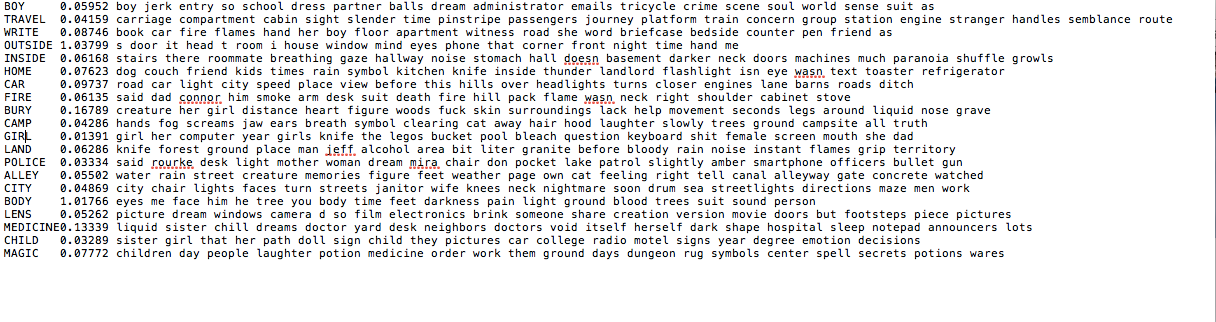

In [21]:
Image(filename = Path + "cleaned_keys.png", width=1100, height=1100)

Body parts, for instance, come up in several topics (GIRL, CAMP), but not with the same insistence as in the BODY category. In the BODY category, bodies are also linked to trees, which makes sense as Slender Man’s body is known to be tree-like. 

Some categories, like TRAVEL and CAR, are very strong. Others, like OUTSIDE, are really just a loosely connected grouping of words that reminded me of someone looking at something (like a house) or experiencing something from the outside of it. While OUTSIDE is garbled, it contrasts pretty strongly with INSIDE, for instance, which seems to be connected by concern with the insides of a house, as well as what terrors might be contained within.

Perhaps most surprising is the GIRL category, which could have easily been categorized as the TECHNOLOGY category. In Slender Man pastas, there is apparently a connection between girls and computers, while there also appears to be a connection between boys and school.

### Uncleaned

Not cleaning the data before running them through a topic modeler produced mostly garbage. 

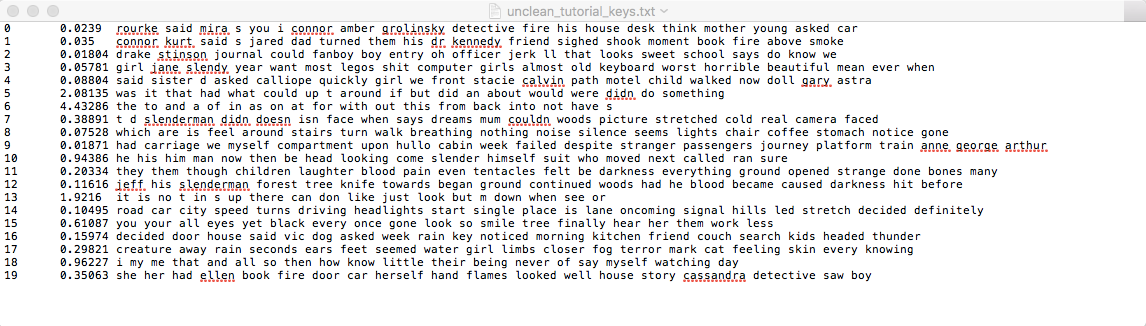

In [22]:
Image(filename = Path + "unclean_keys.png", width=1100, height=1100)

Certain topics are so strong—like the relationship between girls and computers, or travel—that they’re heard even here, in topics 3 and 9, respectively.

## Bigger Project

How do topics break down by time? Because we know that 2014 was a significant time for the Slender Man universe, it would be interesting to see how the topics take shape both before and after this time. As such, I would approach the project much like Calvin Blevins approached Martha Ballard’s diary (pastas have dates, so they’re much like diary entries).

Another project I would like to do is topic model pastas outside of this tag. For instance, I would like to know more about the topics that motivate the most popular or highly rated pastas. This might also be a project for sentiment analysis, as horror is such a complicated mix of fear, ennui, and even humor.